### A breaf explanation on the work
This work presents a way to determine inter-personal physical synchrony state by inspecting hands postures
in hope of better understanding human presaption of it

In the  expirament; different people where doumanted by unique 3D depth camera device named Leap-Motion-Controller in 3 
uniqe states:
##### spontanus mode:
The particpants were asked to move their hands without any diracted aim
##### Alone mode:
Same but by themselfs
##### Syncronaised mode:
The particpants were asked to move their hands with respect to a partner
#### .
In the following notebook I'll try to apply what I have learened through out the last semester on MachineLearning
using pandas and the sklearn libraries to advance this resrech

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import copy

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')
import seaborn as sns


from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.cluster import k_means
from sklearn import metrics 

## Loading the data

In [82]:
targ_dict = {1: 'alone', 2: 'sync', 3: 'spon'}

#I load the different modes of the expirament of each person without
#the first 7 seconds wich creates sort of a time series of activty for each
#person at each mode

#And ofcourse Ill combain the 'RightHand' file with each alone mode recording
right = pd.read_csv(r'C:\Users\ישראל\DS\DataVisuallisition\עבודת גמר - קבצים\extraFiles\HandRight.csv')
right.dropna(how = 'any', axis = 0, inplace = True)
right['mode'] = 1

def AddRight(left):
    minn =  np.min([left.shape[0], right.shape[0]]); i = 0
    new = pd.DataFrame()

    while(i < minn):
        new = pd.concat([new, pd.DataFrame(left.iloc[i]).T])
        new = pd.concat([new, pd.DataFrame(right.iloc[i]).T])
        i +=1

    return new

def prosses(alone, sync, spon):
    alone['mode'] = 1
    sync['mode'] = 2
    spon['mode'] = 3

    for i in [alone,sync,spon]:
        i = i.loc[i['Time'] > i.Time.iloc[0] +7]
    
    alone = AddRight(alone)

    return pd.concat([alone,sync,spon])

In [13]:
spon = pd.read_csv(r'C:\Users\ישראל\DS\DataVisuallisition\עבודת גמר - קבצים\extraFiles\Training\Evyatar Cohen\Evyatar636771052727603804Spontan.csv')
sync = pd.read_csv(r'C:\Users\ישראל\DS\DataVisuallisition\עבודת גמר - קבצים\extraFiles\Training\Evyatar Cohen\Evyatar636771053639929594Sync.csv')
alone = pd.read_csv(r'C:\Users\ישראל\DS\DataVisuallisition\עבודת גמר - קבצים\extraFiles\Training\Evyatar Cohen\Evyatar636771054555711409Alone.csv')

Evyatar = prosses(alone, sync, spon)

spon = pd.read_csv(r'C:\Users\ישראל\DS\DataVisuallisition\עבודת גמר - קבצים\extraFiles\Training\Nofar Social_Nuero\Nofar636759795182793299Spontan.csv')
sync = pd.read_csv(r'C:\Users\ישראל\DS\DataVisuallisition\עבודת גמר - קבצים\extraFiles\Training\Nofar Social_Nuero\Nofar636759797397919664Sync.csv')
alone = pd.read_csv(r'C:\Users\ישראל\DS\DataVisuallisition\עבודת גמר - קבצים\extraFiles\Training\Nofar Social_Nuero\Nofar636759796290435160Alone.csv')

Nofar = prosses(alone, sync, spon)

spon = pd.read_csv(r'C:\Users\ישראל\DS\DataVisuallisition\עבודת גמר - קבצים\extraFiles\Training\Oriya Social_Nuero\Oriya636759804404113837Spontan.csv')
sync = pd.read_csv(r'C:\Users\ישראל\DS\DataVisuallisition\עבודת גמר - קבצים\extraFiles\Training\Oriya Social_Nuero\Oriya636759806131350399Sync.csv')
alone = pd.read_csv(r'C:\Users\ישראל\DS\DataVisuallisition\עבודת גמר - קבצים\extraFiles\Training\Oriya Social_Nuero\Oriya636759801991504932Alone.csv')

Oriya = prosses(alone, sync, spon)

spon = pd.read_csv(r'C:\Users\ישראל\DS\DataVisuallisition\עבודת גמר - קבצים\extraFiles\Training\Orya Kalmanovitz\OryaB636771083605535985Spontan.csv')
sync = pd.read_csv(r'C:\Users\ישראל\DS\DataVisuallisition\עבודת גמר - קבצים\extraFiles\Training\Orya Kalmanovitz\OryaB636771084494502229Sync.csv')
alone = pd.read_csv(r'C:\Users\ישראל\DS\DataVisuallisition\עבודת גמר - קבצים\extraFiles\Training\Orya Kalmanovitz\OryaB636771082736601528Alone.csv')

Orya = prosses(alone, sync, spon)

spon = pd.read_csv(r'C:\Users\ישראל\DS\DataVisuallisition\עבודת גמר - קבצים\extraFiles\Training\Revital Marbel\Revital636770953887274261Spontan.csv')
sync = pd.read_csv(r'C:\Users\ישראל\DS\DataVisuallisition\עבודת גמר - קבצים\extraFiles\Training\Revital Marbel\Revital636770957894370062Sync.csv')
alone = pd.read_csv(r'C:\Users\ישראל\DS\DataVisuallisition\עבודת גמר - קבצים\extraFiles\Training\Revital Marbel\Revital636770955999435879Alone.csv')

Revital = prosses(alone, sync, spon)

spon = pd.read_csv(r'C:\Users\ישראל\DS\DataVisuallisition\עבודת גמר - קבצים\extraFiles\Training\Shahar Terner\Sachar636771045591258071Spontan.csv')
sync = pd.read_csv(r'C:\Users\ישראל\DS\DataVisuallisition\עבודת גמר - קבצים\extraFiles\Training\Shahar Terner\Sachar636771046527112972Sync.csv')
alone = pd.read_csv(r'C:\Users\ישראל\DS\DataVisuallisition\עבודת גמר - קבצים\extraFiles\Training\Shahar Terner\Sachar636771047408504303Alone.csv')

Shahar = prosses(alone, sync, spon)

spon = pd.read_csv(r'C:\Users\ישראל\DS\DataVisuallisition\עבודת גמר - קבצים\extraFiles\Training\Shahar Terner\Sachar636771045591258071Spontan.csv')
sync = pd.read_csv(r'C:\Users\ישראל\DS\DataVisuallisition\עבודת גמר - קבצים\extraFiles\Training\Shahar Terner\Sachar636771046527112972Sync.csv')
alone = pd.read_csv(r'C:\Users\ישראל\DS\DataVisuallisition\עבודת גמר - קבצים\extraFiles\Training\Shahar Terner\Sachar636771047408504303Alone.csv')

Shelly = prosses(alone, sync, spon)

spon = pd.read_csv(r'C:\Users\ישראל\DS\DataVisuallisition\עבודת גמר - קבצים\extraFiles\Training\Yael Hagai\Yael636771059544754823Spontan.csv')
sync = pd.read_csv(r'C:\Users\ישראל\DS\DataVisuallisition\עבודת גמר - קבצים\extraFiles\Training\Yael Hagai\Yael636771060699529085Sync.csv')
alone = pd.read_csv(r'C:\Users\ישראל\DS\DataVisuallisition\עבודת גמר - קבצים\extraFiles\Training\Yael Hagai\Yael636771061659067649Alone.csv')

Yael = prosses(alone, sync, spon)

spon = pd.read_csv(r'C:\Users\ישראל\DS\DataVisuallisition\עבודת גמר - קבצים\extraFiles\Training\Yoel Raz\Yoel636760921663075813Spontan.csv')
sync = pd.read_csv(r'C:\Users\ישראל\DS\DataVisuallisition\עבודת גמר - קבצים\extraFiles\Training\Yoel Raz\Yoel636760923490742912Sync.csv')
alone = pd.read_csv(r'C:\Users\ישראל\DS\DataVisuallisition\עבודת גמר - קבצים\extraFiles\Training\Yoel Raz\Yoel636760922573364655Alone.csv')

Yoel = prosses(alone, sync, spon)

In [14]:
Evyatar['person'] = 'Evyatar'
Yoel['person'] = 'Yoel'
Yael['person'] = 'Yael'
Shelly['person'] = 'Shelly'
Shahar['person'] = 'Shahar'
Revital['person'] = 'Revital'
Orya['person'] = 'Orya'
Oriya['person'] = 'Oriya'
Nofar['person'] = 'Nofar'

df = pd.concat([Evyatar, Yoel, Yael, Shelly, Shahar, Revital, Orya, Oriya, Nofar]).reset_index(drop = True)
df.head()

,Time,Frame ID,Hand Type,# hands,Position X,Position Y,Position Z,Velocity X,Velocity Y,Velocity Z,...,Wrist Pos Y,Wrist Pos Z,Elbow pos X,Elbow Pos Y,Elbow Pos Z,Grab Strenth,Grab Angle,Pinch Strength,mode,person
0,518.809,149620,left,1,-97.6016,164.121,42.8126,104.259,-491.673,-55.4275,...,164.832,27.5855,-378.166,65.8933,-69.9028,0,0.741855,0,1,Evyatar
1,128.288,15478,right,1,15.6717,226.206,20.2647,34.2666,-195.215,-35.043,...,207.355,86.2359,203.834,49.3351,237.455,0,0.206389,0,1,Evyatar
2,518.825,149622,left,1,-95.7806,157.635,42.1808,148.968,-351.739,-36.3242,...,155.642,29.7104,-380.323,52.9244,-55.7187,0,0.827916,0,1,Evyatar
3,128.305,15480,right,1,16.2412,222.939,20.1178,36.1644,-180.094,-4.0528,...,205.657,86.4225,203.955,47.8827,238.448,0,0.24305,0,1,Evyatar
4,518.842,149623,left,1,-94.3936,154.634,41.9317,161.696,-349.912,-29.0428,...,151.57,31.0506,-381.744,48.5503,-47.2791,0,0.920401,0,1,Evyatar


In [89]:
#df.to_csv(r'C:\Users\ישראל\DS\DataVisuallisition\עבודת גמר - קבצים\extraFiles\prossesed_training.csv')
df = pd.read_csv(r'C:\Users\ישראל\DS\DataVisuallisition\עבודת גמר - קבצים\extraFiles\prossesed_training.csv')

In [4]:
df.shape

(227708, 25)

In [90]:
df.drop(' Frame ID', axis = 1, inplace = True)

In [21]:
#what precantage of each column is missing
df.isnull().sum() / df.isnull().count() *100

Time               0.0
 Hand Type         0.0
 # hands           0.0
 Position X        0.0
 Position Y        0.0
 Position Z        0.0
 Velocity X        0.0
 Velocity Y        0.0
 Velocity Z        0.0
 Pitch             0.0
 Roll              0.0
 Yaw               0.0
 Wrist Pos X       0.0
 Wrist Pos Y       0.0
 Wrist Pos Z       0.0
 Elbow pos X       0.0
 Elbow Pos Y       0.0
 Elbow Pos Z       0.0
 Grab Strenth      0.0
 Grab Angle        0.0
 Pinch Strength    0.0
mode               0.0
person             0.0
dtype: float64

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227708 entries, 0 to 227707
Data columns (total 23 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   Time             227708 non-null  object
 1    Hand Type       227708 non-null  object
 2    # hands         227708 non-null  object
 3    Position X      227708 non-null  object
 4    Position Y      227708 non-null  object
 5    Position Z      227708 non-null  object
 6    Velocity X      227708 non-null  object
 7    Velocity Y      227708 non-null  object
 8    Velocity Z      227708 non-null  object
 9    Pitch           227708 non-null  object
 10   Roll            227708 non-null  object
 11   Yaw             227708 non-null  object
 12   Wrist Pos X     227708 non-null  object
 13   Wrist Pos Y     227708 non-null  object
 14   Wrist Pos Z     227708 non-null  object
 15   Elbow pos X     227708 non-null  object
 16   Elbow Pos Y     227708 non-null  object
 17   Elbow Pos

In [91]:
hand_dict = {'right': 0, 'left': 1}
df[' Hand Type'].replace(hand_dict, inplace = True)
df.drop(' # hands', axis = 1, inplace = True)#its a clear indicator to the alone mode

In [92]:
for i in list(df.columns[:-1]):
    df[i] = df[i].astype(float)

In [93]:
df.drop('Unnamed: 0', axis = 1, inplace = True)

## Exploring the data

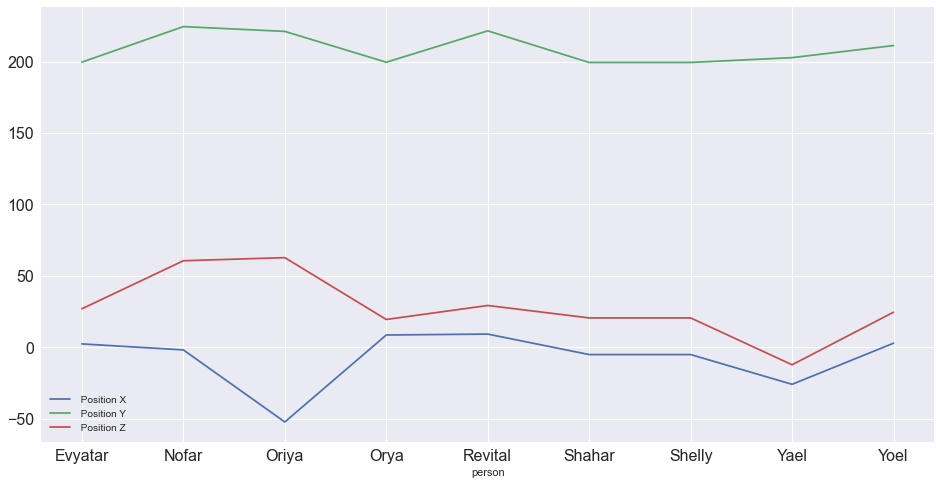

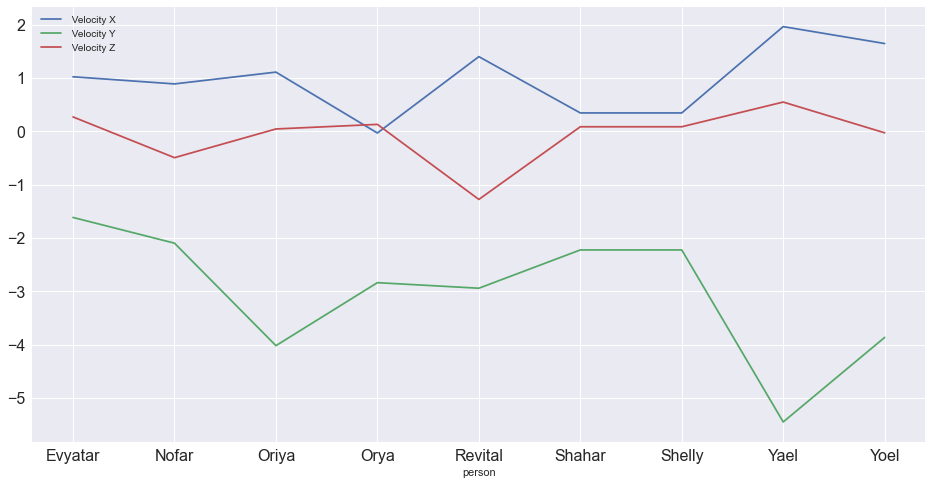

In [54]:
df.groupby('person')[[' Position X', ' Position Y',' Position Z']].mean().plot(figsize = (16,8), fontsize = 16)
plt.show()
df.groupby('person')[[' Velocity X', ' Velocity Y', ' Velocity Z']].mean().plot(figsize = (16,8), fontsize = 16)
plt.show()


In [9]:
#looks like the 'Position Y' feature is describes different people more jenraly yet on the Y&Z axises
#the position of the particpants palms very more(but only with the first 3 particpants) 

#Regarding velosties, it seems like the opposite is true(not including Revital)

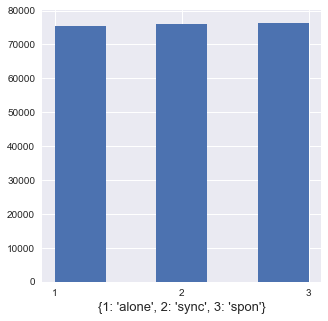

In [29]:
df['mode'].hist(bins = 5, figsize = (5,5))
plt.xticks([1,2,3])
plt.xlabel(targ_dict, fontsize = 13)
plt.show()

In [ ]:
#The data is rathly balanced

In [29]:
df.columns[2:-2]

Index([' Position X', ' Position Y', ' Position Z', ' Velocity X',
       ' Velocity Y', ' Velocity Z', ' Pitch', ' Roll', ' Yaw', ' Wrist Pos X',
       ' Wrist Pos Y', ' Wrist Pos Z', ' Elbow pos X', ' Elbow Pos Y',
       ' Elbow Pos Z', ' Grab Strenth', ' Grab Angle', ' Pinch Strength'],
      dtype='object')

In [30]:
len(list(df.columns[2:-2]))

18

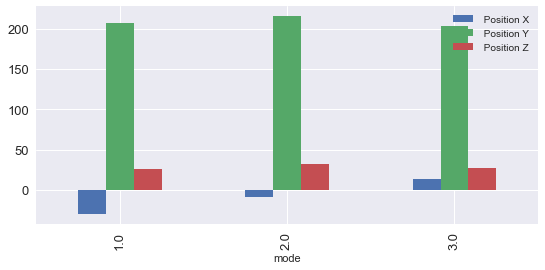

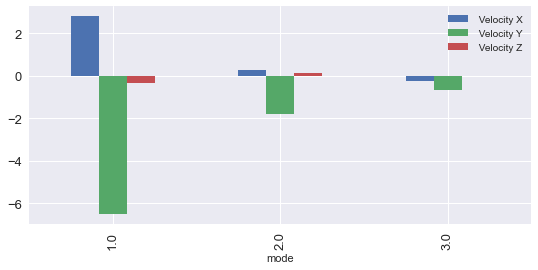

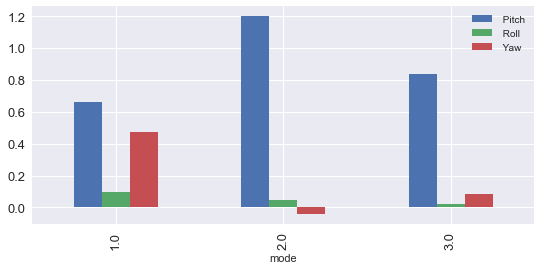

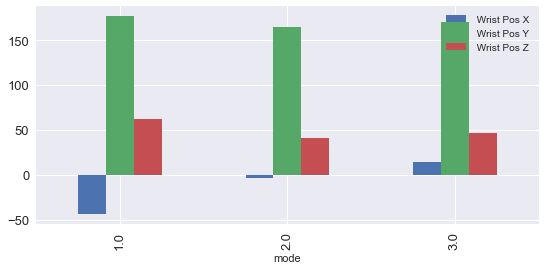

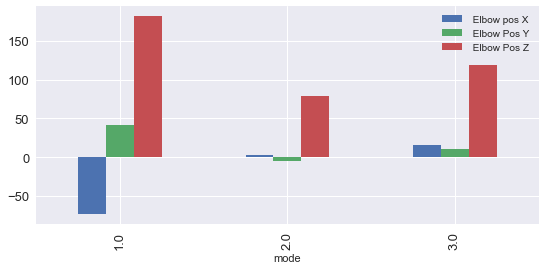

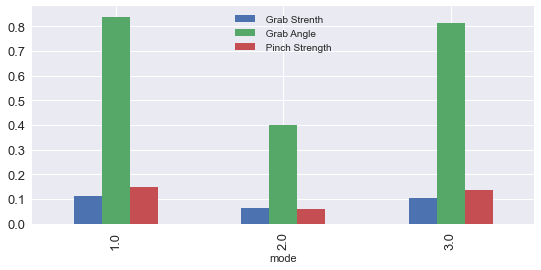

In [51]:
i = 0
while(i != 18):
    df.groupby('mode')[list(df.columns[2:-2])[i:i+3]].mean().plot(kind = 'bar', figsize = (9,4), fontsize = 13)
    i +=3
plt.show()

In [94]:
LowVariance = [' Position Y', ' Wrist Pos Y']
#the rest are in high/modarte corralation to the target variable

## Appling The Models

preprossesing

In [55]:
#I cant split the data at random cause the conteniuety of the data is important
#moreover I do need to split the data without mixing different people

def MySpliter(df, strlist, precent):
    train = []
    test = []
    
    for i in range(len(strlist)):
        data = df.loc[df['person'] == strlist[i]]
        for j in [1,2,3]:
            x = data.loc[data['mode'] == j]
            rows = int(x.shape[0]*precent)
        
            train.append(x[:rows])
            test.append(x[rows:])
        
    return pd.concat(train), pd.concat(test)    

In [56]:
train, test = MySpliter(df, list(df.person.unique()), 0.9)

print(train.shape[0], ',', test.shape[0])

204927 , 22781


In [57]:
trainY = train['mode']
trainX = train.drop('mode', axis =1)
testY = test['mode']
testX = test.drop('mode', axis =1)

trainX.drop('person', axis = 1, inplace = True)
testX.drop('person', axis = 1, inplace = True)

In [58]:
s = StandardScaler()

trainX_hand = trainX[' Hand Type'].reset_index(drop = True)
testX_hand = testX[' Hand Type'].reset_index(drop = True)
trainX.drop(' Hand Type', axis = 1, inplace = True)
testX.drop(' Hand Type', axis = 1, inplace = True)

trainX = pd.DataFrame(s.fit_transform(trainX)).reset_index(drop = True)
testX = pd.DataFrame(s.fit_transform(testX)).reset_index(drop = True)

trainX = pd.concat([trainX, trainX_hand], axis = 1)
testX = pd.concat([testX, testX_hand], axis = 1)

#exluding categorial data

trying different algorithms

In [59]:
#baceline preformance

dummy = DummyClassifier(strategy = 'most_frequent')
dummy.fit(trainX, trainY)
dummy.score(testX, testY)

0.3353232957288969

In [42]:
knn = KNeighborsClassifier(n_neighbors = 5)
rf = RandomForestClassifier(max_depth = 6, n_estimators = 300, min_samples_split = 20)
lr = LogisticRegression()

estimators = [knn, rf, lr]
for i in estimators:
    i.fit(trainX, trainY)
    y_pred = i.predict(testX)
    print(metrics.accuracy_score(testY, y_pred))

0.8801632939730477
0.8573811509591326
0.7245072648259514


Ensamble methods & optimsation

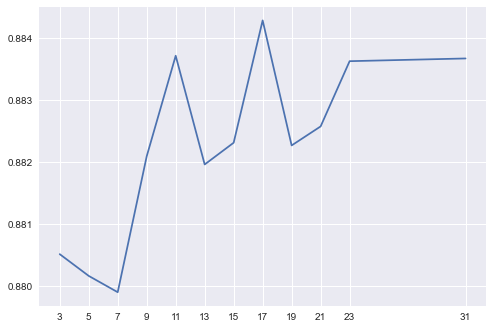

0.8842895395285545


In [43]:
K_range = [3,5,7,9,11,13,15,17,19,21,23,31]
scores = []

for k in K_range:
    knn = KNeighborsClassifier(n_neighbors=k, n_jibs = -1)
    knn.fit(trainX, trainY)
    y_pred = knn.predict(testX)
    scores.append(metrics.accuracy_score(testY, y_pred)) 
    
plt.plot(K_range, scores)
plt.xticks(K_range)
plt.grid(True)
plt.show()
print(max(scores))    

In [63]:
#inorder to prevant overfitting Ill use sklearn.gridsearchCV algorithm
#on different subsets of the data & limit the model to 200 estimators
grid = {'max_depth': [6,9,12], 'min_samples_split': [20, 30]}

G = GridSearchCV(RandomForestClassifier(n_estimators = 200), grid, cv = 5, n_jobs = -1)
G.fit(trainX, trainY)
y_pred = G.predict(testX)
print(metrics.accuracy_score(testY, y_pred))

0.942715420745358


In [64]:
pd.DataFrame(G.cv_results_).mean_test_score.sort_values(ascending = False)

4    0.821571
5    0.820678
3    0.813363
2    0.810919
0    0.783665
1    0.783167
Name: mean_test_score, dtype: float64

In [ ]:
#this is the real score predicted by a model which isnt overfitted

In [65]:
results_RF = pd.DataFrame(G.cv_results_)

In [66]:
G.best_params_

{'max_depth': 12, 'min_samples_split': 20}

In [60]:
RF = RandomForestClassifier(max_depth = 12, n_estimators = 200, min_samples_split = 20, n_jobs = -1)

In [101]:
grid = {'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'], 'weights': ['uniform', 'distance'], 'n_neighbors': [11,17]}

G = GridSearchCV(KNeighborsClassifier(), grid, cv = 5, n_jobs = -1)
G.fit(trainX, trainY)
y_pred = G.predict(testX)
print(metrics.accuracy_score(testY, y_pred))

0.8852552565734604


In [105]:
results_knn = pd.DataFrame(G.cv_results_)
results_knn.mean_test_score.sort_values(ascending = False)

15    0.784636
11    0.784636
7     0.784636
3     0.784636
13    0.782767
9     0.782767
5     0.782767
1     0.782767
14    0.782303
10    0.782303
6     0.782303
2     0.782303
12    0.781649
8     0.781649
4     0.781649
0     0.781649
Name: mean_test_score, dtype: float64

In [106]:
G.best_params_

{'algorithm': 'auto', 'n_neighbors': 17, 'weights': 'distance'}

In [61]:
knn = KNeighborsClassifier(algorithm =  'auto', n_neighbors =  17, weights =  'distance')

GradientBoosting

In [92]:
#same

grid = {'learning_rate': [0.2,0.3,0.5]}#this algorithm is too slow already for an extancive search

G = GridSearchCV(GradientBoostingClassifier(n_estimators = 200, max_depth = 6, min_samples_split = 20), grid, cv = 5, n_jobs = -1)
G.fit(trainX, trainY)
y_pred = G.predict(testX)
print(metrics.accuracy_score(testY, y_pred))

0.9654536675299592


In [93]:
G.best_params_

{'learning_rate': 0.3}

In [62]:
GB = GradientBoostingClassifier(n_estimators = 200, max_depth = 6, min_samples_split = 20, learning_rate = 0.3)

In [97]:
results_GB = pd.DataFrame(G.cv_results_)

In [99]:
results_GB.mean_test_score.sort_values(ascending = False)

1    0.760915
0    0.759724
2    0.754127
Name: mean_test_score, dtype: float64

In [139]:
#Ill try aggregating everything up

In [15]:
estimators = list(zip(['GB', 'RF', 'knn'], [GB, RF, knn]))
#I wanna give the better model extra credit and only
#give a chance to the others to change the result when they'r extrimly confident

vc = VotingClassifier(estimators, voting = 'soft', weights = [0.2,1,0.2])
vc.fit(trainX, trainY)
y_pred = vc.predict(testX)
print(metrics.accuracy_score(testY, y_pred))

0.988367499231816


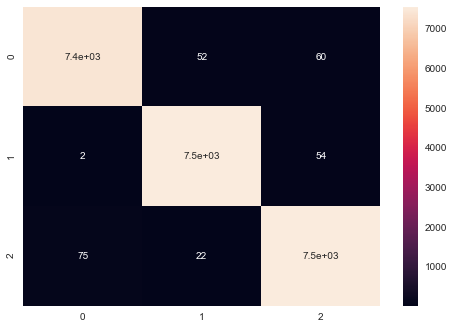

In [16]:
mat_results = metrics.confusion_matrix(testY, y_pred)

sns.heatmap(mat_results, annot = True)
plt.show()

An idea for a feature inspaired by the graphs from earlier:

In [95]:
df['vec_X'] = df[' Position X'].mul(df[' Velocity X'])
df['vec_Y'] = df[' Position Y'].mul(df[' Velocity Y'])
df['vec_Z'] = df[' Position Z'].mul(df[' Velocity Z'])

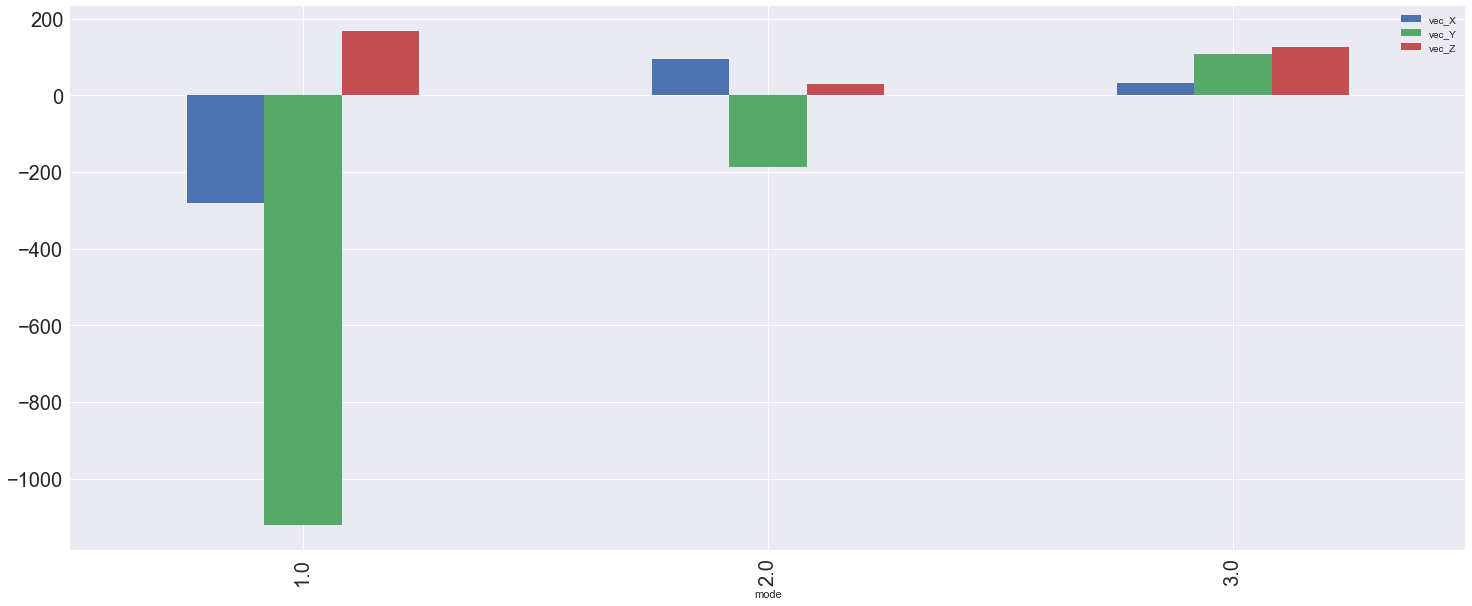

In [65]:
df.groupby('mode')[['vec_X', 'vec_Y','vec_Z']].mean().plot(kind = 'bar', figsize = (25,10), fontsize = 20)
plt.show()

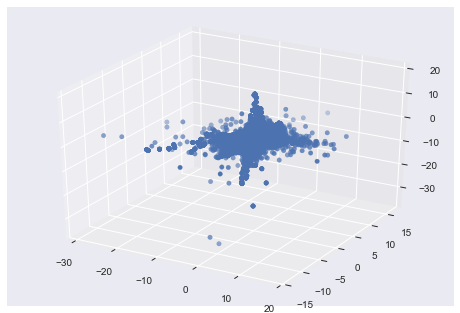

count    2.277080e+05
mean    -7.347058e-17
std      1.152716e+00
min     -1.469880e+01
25%     -5.114592e-01
50%     -1.632351e-02
75%      4.747445e-01
max      2.394418e+01
Name: Vec, dtype: float64

In [96]:
#Using PrincapleComponantAnalsis to find the best liniar combination of my new features
pca = PCA(1)

vectors = df[['vec_X', 'vec_Y', 'vec_Z']].copy()
vectors = pd.DataFrame(s.fit_transform(vectors))

x = vectors[0]; y = vectors[1]; z = vectors[2]

ax = plt.axes(projection = '3d')
ax.scatter3D(x,y,z)
plt.show()

vectors = pd.Series(pca.fit_transform(vectors).reshape(1,-1)[0])

df.drop(['vec_X', 'vec_Y', 'vec_Z'], axis = 1, inplace = True)
df['Vec'] = vectors
df.Vec.describe()

In [67]:
#reapting the preprosseing

train, test = MySpliter(df, list(df.person.unique()), 0.9)
trainY = train['mode']
trainX = train.drop('mode', axis =1)
testY = test['mode']
testX = test.drop('mode', axis =1)
trainX.drop('person', axis = 1, inplace = True)
testX.drop('person', axis = 1, inplace = True)

s = StandardScaler()

trainX_hand = trainX[' Hand Type'].reset_index(drop = True)
testX_hand = testX[' Hand Type'].reset_index(drop = True)
trainX.drop(' Hand Type', axis = 1, inplace = True)
testX.drop(' Hand Type', axis = 1, inplace = True)

trainX = pd.DataFrame(s.fit_transform(trainX)).reset_index(drop = True)
testX = pd.DataFrame(s.fit_transform(testX)).reset_index(drop = True)

trainX = pd.concat([trainX, trainX_hand], axis = 1)
testX = pd.concat([testX, testX_hand], axis = 1)

In [36]:
vc.fit(trainX, trainY)
y_pred = vc.predict(testX)
print(metrics.accuracy_score(testY, y_pred))

0.9885869803783855


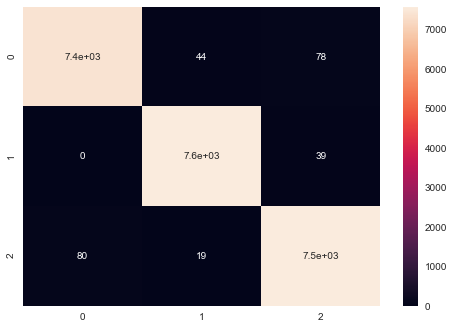

In [37]:
mat_results = metrics.confusion_matrix(testY, y_pred)

sns.heatmap(mat_results, annot = True)
plt.show()

last idea: regarding each 5 consequtive instances as one

In [68]:
train, test = MySpliter(df, list(df.person.unique()), 0.9)

train['time_instance'] = pd.qcut(train.index, train.shape[0]//5, duplicates = 'drop')
test['time_instance'] = pd.qcut(test.index, test.shape[0]//5, duplicates = 'drop')


trainY = train.groupby('time_instance').median()['mode']
testY = test.groupby('time_instance').median()['mode']

trainX = train.drop(['mode', ' Hand Type'], axis = 1)
testX = test.drop(['mode', ' Hand Type'], axis = 1)

trainX = trainX.groupby('time_instance').var()
testX = testX.groupby('time_instance').var()

In [70]:
trainX.head()

,Unnamed: 0,Time,Position X,Position Y,Position Z,Velocity X,Velocity Y,Velocity Z,Pitch,Roll,...,Wrist Pos X,Wrist Pos Y,Wrist Pos Z,Elbow pos X,Elbow Pos Y,Elbow Pos Z,Grab Strenth,Grab Angle,Pinch Strength,Vec
time_instance,,,,,,,,,,,,,,,,,,,,,
"(-0.001, 5.0]",3.5,45751.823825,3773.609909,1263.192846,147.912748,3748.573470,21231.502454,345.568095,1.485355,0.002237,...,13618.419493,724.813360,972.091884,102393.637378,54.645746,26198.910148,0.000000,0.106954,0.0,0.215938
"(5.0, 10.0]",2.5,45753.702194,3409.069343,1522.454616,161.539898,4526.188481,4696.726836,988.267671,0.422051,0.010026,...,13005.000878,1264.096544,727.309484,103081.435589,101.272643,18999.450111,0.001683,0.226987,0.0,0.084330
"(10.0, 15.0]",2.5,45753.713914,2943.509813,1791.368366,182.999622,14318.253323,11492.255550,109.654148,0.213714,0.016079,...,12000.387759,1568.745817,515.931957,102057.795811,39.022245,11633.881815,0.002489,0.283935,0.0,0.270456
"(15.0, 20.0]",2.5,45753.698288,2413.301308,2242.668411,193.298791,16699.829757,16577.319527,412.553721,0.135549,0.022039,...,10925.053047,1906.347047,375.121604,101826.746109,210.913625,6595.535133,0.000228,0.149328,0.0,0.273240
"(20.0, 25.0]",2.5,45753.624094,1901.413700,2500.619445,208.397024,14199.813252,651.119234,187.585937,0.155675,0.040091,...,9702.158552,2458.041267,284.908155,96118.350036,22.907979,5320.585438,0.000000,0.014072,0.0,0.072034


In [74]:
trainX = s.fit_transform(trainX)
testX = s.fit_transform(testX)

vc.fit(trainX, trainY)
y_pred = vc.predict(testX)
print(metrics.accuracy_score(testY, y_pred))

0.9247146619841967


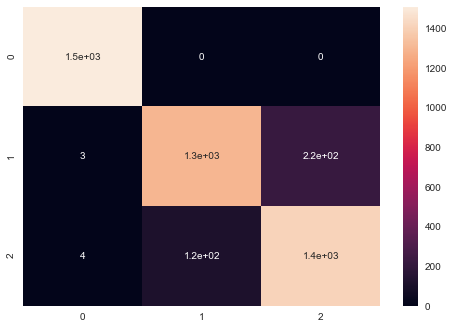

In [75]:
mat_results = metrics.confusion_matrix(testY, y_pred)

sns.heatmap(mat_results, annot = True)
plt.show()

In [69]:
#lets try avarage instead of veriance

train, test = MySpliter(df, list(df.person.unique()), 0.9)

train['time_instance'] = pd.qcut(train.index, train.shape[0]//5, duplicates = 'drop')
test['time_instance'] = pd.qcut(test.index, test.shape[0]//5, duplicates = 'drop')


trainY = train.groupby('time_instance').median()['mode']
testY = test.groupby('time_instance').median()['mode']

trainX = train.drop(['mode', ' Hand Type'], axis = 1)
testX = test.drop(['mode', ' Hand Type'], axis = 1)

trainX = trainX.groupby('time_instance').mean()
testX = testX.groupby('time_instance').mean()

In [79]:
trainX = s.fit_transform(trainX)
testX = s.fit_transform(testX)

vc.fit(trainX, trainY)
y_pred = vc.predict(testX)
print(metrics.accuracy_score(testY, y_pred))

0.9874890254609306


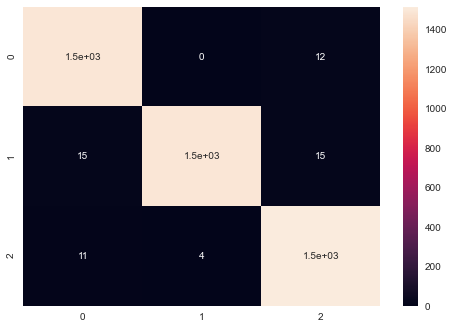

In [80]:
mat_results = metrics.confusion_matrix(testY, y_pred)

sns.heatmap(mat_results, annot = True)
plt.show()

In [ ]:
#perfect

### Final avaluation with the validation set

In [83]:
#reapting the same prosses

spon = pd.read_csv(r'C:\Users\ישראל\DS\DataVisuallisition\עבודת גמר - קבצים\extraFiles\Validation\Itiel Lab\Itiel636770940701219076Spontan.csv')
sync = pd.read_csv(r'C:\Users\ישראל\DS\DataVisuallisition\עבודת גמר - קבצים\extraFiles\Validation\Itiel Lab\Itiel636770941638547912Sync.csv')
alone = pd.read_csv(r'C:\Users\ישראל\DS\DataVisuallisition\עבודת גמר - קבצים\extraFiles\Validation\Itiel Lab\Itiel636770942529041679Alone.csv')

Itiel = prosses(alone, sync, spon)


spon = pd.read_csv(r'C:\Users\ישראל\DS\DataVisuallisition\עבודת גמר - קבצים\extraFiles\Validation\Mor SHerman\Mor636771064635567065Spontan.csv')
sync = pd.read_csv(r'C:\Users\ישראל\DS\DataVisuallisition\עבודת גמר - קבצים\extraFiles\Validation\Mor SHerman\Mor636771065531910215Sync.csv')
alone = pd.read_csv(r'C:\Users\ישראל\DS\DataVisuallisition\עבודת גמר - קבצים\extraFiles\Validation\Mor SHerman\Mor636771066407626524Alone.csv')

Mor = prosses(alone, sync, spon)


spon = pd.read_csv(r'C:\Users\ישראל\DS\DataVisuallisition\עבודת גמר - קבצים\extraFiles\Validation\Oded Medina\Oded636754670490266956Spontan.csv')
sync = pd.read_csv(r'C:\Users\ישראל\DS\DataVisuallisition\עבודת גמר - קבצים\extraFiles\Validation\Oded Medina\Oded636754671560850581Sync.csv')
alone = pd.read_csv(r'C:\Users\ישראל\DS\DataVisuallisition\עבודת גמר - קבצים\extraFiles\Validation\Oded Medina\Oded636754669540564461Alone.csv')

Oded = prosses(alone, sync, spon)

Oded['person'] = 'Oded'
Mor['person'] = 'Mor'
Itiel['person'] = 'Itiel'


df2 = pd.concat([Oded, Mor, Itiel])
df2.head()

,Time,Frame ID,Hand Type,# hands,Position X,Position Y,Position Z,Velocity X,Velocity Y,Velocity Z,...,Wrist Pos Y,Wrist Pos Z,Elbow pos X,Elbow Pos Y,Elbow Pos Z,Grab Strenth,Grab Angle,Pinch Strength,mode,person
0,721.944,45474,left,1,-141.59,229.928,36.1772,1.00075,-3.65738,-2.08431,...,176.565,68.8723,-322.981,-20.4166,171.148,0,0.722829,0,1,Oded
0,128.288,15478,right,1,15.6717,226.206,20.2647,34.2666,-195.215,-35.043,...,207.355,86.2359,203.834,49.3351,237.455,0,0.206389,0,1,Oded
1,721.977,45475,left,1,-141.531,229.779,36.1188,2.37057,-5.99966,-2.34694,...,176.459,68.8155,-323.403,-20.1432,171.235,0,0.723772,0,1,Oded
1,128.305,15480,right,1,16.2412,222.939,20.1178,36.1644,-180.094,-4.0528,...,205.657,86.4225,203.955,47.8827,238.448,0,0.24305,0,1,Oded
2,722.011,45477,left,1,-141.391,229.641,36.0974,3.33466,-3.03418,-0.422878,...,176.37,68.7963,-324.577,-19.201,171.457,0,0.722777,0,1,Oded


In [97]:
#df2.to_csv(r'C:\Users\ישראל\DS\DataVisuallisition\עבודת גמר - קבצים\extraFiles\prossesed_validation.csv')
df2 = pd.read_csv(r'C:\Users\ישראל\DS\DataVisuallisition\עבודת גמר - קבצים\extraFiles\prossesed_validation.csv')

In [98]:
df2.reset_index(drop = True, inplace = True)
df2.drop(' Frame ID', axis = 1, inplace = True)
df2[' Hand Type'].replace(hand_dict, inplace = True)
df2.drop(' # hands', axis = 1, inplace = True)

In [99]:
for i in list(df2.columns[:-1]):
    df2[i] = df2[i].astype(float)

In [100]:
df2.drop('Unnamed: 0', axis = 1, inplace = True)

In [101]:
df2['vec_X'] = df2[' Position X'].mul(df2[' Velocity X'])
df2['vec_Y'] = df2[' Position Y'].mul(df2[' Velocity Y'])
df2['vec_Z'] = df2[' Position Z'].mul(df2[' Velocity Z'])

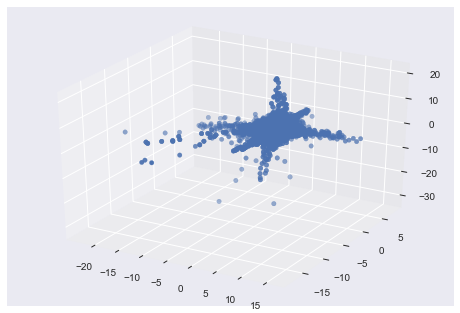

count    6.692400e+04
mean     1.067688e-17
std      1.132445e+00
min     -1.123546e+01
25%     -4.733251e-01
50%     -2.056692e-02
75%      4.268872e-01
max      2.075668e+01
Name: Vec, dtype: float64

In [102]:
pca = PCA(1)

vectors = df2[['vec_X', 'vec_Y', 'vec_Z']].copy()
vectors = pd.DataFrame(s.fit_transform(vectors))

x = vectors[0]; y = vectors[1]; z = vectors[2]

ax = plt.axes(projection = '3d')
ax.scatter3D(x,y,z)
plt.show()

vectors = pd.Series(pca.fit_transform(vectors).reshape(1,-1)[0])

df2.drop(['vec_X', 'vec_Y', 'vec_Z'], axis = 1, inplace = True)
df2['Vec'] = vectors
df2.Vec.describe()

In [103]:
df2['time_instance'] = pd.qcut(df2.index, df2.shape[0]//5, duplicates = 'drop')

labels2 = df2.groupby('time_instance').median()['mode']

df2 = df2.drop(['mode', ' Hand Type'], axis = 1)

df2 = df2.groupby('time_instance').mean()

df['time_instance'] = pd.qcut(df.index, df.shape[0]//5, duplicates = 'drop')

labels = df.groupby('time_instance').median()['mode']

df = df.drop(['mode', ' Hand Type'], axis = 1)

df = df.groupby('time_instance').mean()

In [104]:
trainingSet = df
validationSet = df2
trainingLabels = labels
validationLabels = labels2

In [107]:
trainingSet = s.fit_transform(trainingSet)
validationSet = s.transform(validationSet)# doesnt refit

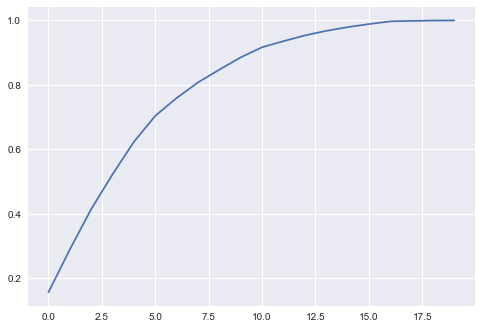

In [108]:
pca = PCA()
pca.fit(trainingSet)
cumsum = np.cumsum(pca.explained_variance_ratio_)
plt.plot(cumsum)
plt.show()

In [109]:
pca = PCA(10)
trainingSet = pca.fit_transform(trainingSet)
validationSet = pca.transform(validationSet)# doesnt refit

In [124]:
from random import shuffle
#now that each instance is a condance version of 5 consequtive timestamps I can shuffle the data

def Mix(data, labels):
    x = list(zip(data,labels))
    shuffle(x)
    y = list(zip(*x))
    return list(y[0]), list(y[1])

trainingSet, trainingLabels = Mix(trainingSet, trainingLabels)
validationSet, validationLabels = Mix(validationSet, validationLabels)

In [127]:
vc.fit(trainingSet, trainingLabels)
y_pred = vc.predict(validationSet)
metrics.accuracy_score(validationLabels, y_pred)

0.5924237895995218

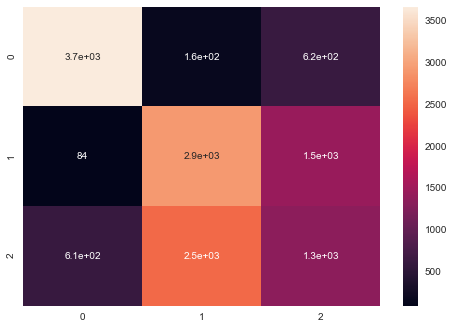

In [128]:
mat_results = metrics.confusion_matrix(validationLabels, y_pred)

sns.heatmap(mat_results, annot = True)
plt.show()

In [ ]:
#thats it, thats my best
#I dont know what went wrong
#looks like over fitting but I did what I could to prevant that

In [ ]:
#If(and thats a big if) I did everything right, perhaps the take a way from this work
#shold be that their no spacial specific pattern/behaivior/presaption of inter-personal physical synchrony
#shared across all people however inside the mind of every specific person their is such information casuse
#when the training and testing sets were of the same people my model handled it almost perfectly

#or maybe this is a work for CNNs